## Stimulus Response Analyses 

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from matplotlib.lines import Line2D

from convnwb.io import load_nwbfile

from spiketools.plts.trials import plot_rate_by_time
from spiketools.plts.annotate import add_vlines
from spiketools.plts.style import drop_spines
from spiketools.plts.trials import plot_rasters, create_raster_title
from spiketools.plts.utils import make_axes, save_figure, make_grid, get_grid_subplot
from spiketools.utils.epoch import epoch_spikes_by_event, epoch_data_by_range
from spiketools.utils.base import select_from_list
from spiketools.measures.trials import compute_trial_frs
from spiketools.stats.trials import compare_pre_post_activity
from spiketools.utils.extract import get_value_by_time,get_inds_by_times
from spiketools.plts.annotate import color_pvalue
from spiketools.plts.style import drop_spines

In [3]:
import seaborn as sns
sns.set_context('talk')

In [4]:
import sys
sys.path.append('../code')
from utils import group_array_by_key

### Settings

In [5]:
# Define the base data folder
data_folder = '/Users/weijiazhang/Data/Train_NWB'
# Define subject information
session = {
    'experiment' : 'TRAIN',
    'subject' : 'R1219C',
    'session' : 0    
}

In [6]:
# Set a unit of interest to select
uind = 2

In [7]:
# Set the time range to analyze, and pre & post trial windows (in seconds)
trial_range = [-1, 1]
pre_window = [-1, 0]
post_window = [0, 1]

### Load Data

In [8]:
# Load NWB file
nwbfile = load_nwbfile(session, data_folder)

In [9]:
# Get object and object position
obj = nwbfile.trials.object[:]
obj_pos = nwbfile.trials.object[:]

In [10]:
# Check the number of units 
n_units = len(nwbfile.units)

print('Number of units: {}'.format(n_units))

Number of units: 23


In [11]:
# Get spikes for unit of interest
spikes = nwbfile.units.get_unit_spike_times(uind)

### Subject Response time and position

In [12]:
# Get subject response position and time 
res_pos = nwbfile.trials.response_position[:]
res_time = nwbfile.trials.response_time[:]

In [13]:
# Check the number of responses
n_response = len(res_time)
print('Number of responses: {}'.format(n_response ))

Number of responses: 64


In [14]:
# Gather neural data around trials of interest
all_trials_response = epoch_spikes_by_event(spikes, res_time, trial_range)
all_trials_response

[array([-0.27018341]),
 array([-0.30566043, -0.03146043]),
 array([0.57885138]),
 array([-0.69148354,  0.59704979]),
 array([0.17982414]),
 array([0.71478976]),
 array([-0.51289539]),
 array([-0.40118773,  0.78974561]),
 array([-0.08523693]),
 array([-0.88355112]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([-0.34272529,  0.73484137]),
 array([-0.89115988, -0.15295988]),
 array([-0.93431242, -0.59004575, -0.47561242, -0.24717909,  0.43598758]),
 array([0.35051201, 0.56361201, 0.78534535]),
 array([], dtype=float64),
 array([0.69982655]),
 array([-0.83363045,  0.35200288]),
 array([-0.54220535]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([0.19540544, 0.33590544]),
 array([0.31354121]),
 array([-0.22777373,  0.53989294]),
 array([], dtype=float64),
 array([0.01117108]),
 array([], dtype=float64),
 array([], dtype=float64),
 array([-0.79698143, -0.0014481 ,  0.01771857,  0.6708519 ,  0.82788524]),
 array([-0.49524297, -0.4003763 , -0.08924297]),
 array

In [15]:
## Compute averages & statistical comparison of pre / post window firing rates
## The t value and p statistic for a t-test comparing pre and post event firing.
avg_pre, avg_post, t_val, p_val = compare_pre_post_activity(all_trials_response, pre_window, post_window)

###  Subject response time / object appear time - Split by object

#### Get object appear time: stim time

In [68]:
start_time = nwbfile.trials['start_time']
stop_time = nwbfile.trials['stop_time']
pos = nwbfile.acquisition['position']['player_position'].data[:]
time_stamps = nwbfile.acquisition['position']['player_position'].timestamps[:]
epoch_pos = epoch_data_by_range(time_stamps,pos,start_time,stop_time)
obj_pos = nwbfile.trials['object_position'].data[:]

In [69]:

ind_obj = np.zeros(len(epoch_pos[0]))
for i in range(len(epoch_pos[0])):
    ind_obj[i] = get_inds_by_times(np.array(epoch_pos[1][i]),np.array([obj_pos[i]]))
    
stim_time = np.zeros(len(epoch_pos[0]))
for i in range(len(ind_obj)):
    ind = int(ind_obj[i])
    stim_time[i] = epoch_pos[0][i][ind]
    

stim_time

array([1.69988013e+00, 3.00978772e+01, 6.79952048e+01, 9.16935337e+01,
       1.39290177e+02, 2.03585643e+02, 2.64681334e+02, 2.94679219e+02,
       3.19877442e+02, 3.59374657e+02, 3.95272125e+02, 4.33769410e+02,
       5.02464566e+02, 5.31562514e+02, 5.69359849e+02, 6.22856076e+02,
       6.58853537e+02, 6.95150978e+02, 7.20149215e+02, 7.47347297e+02,
       7.88444399e+02, 8.32241310e+02, 8.79737961e+02, 9.03936254e+02,
       9.31234329e+02, 9.65931882e+02, 9.96429731e+02, 1.02172795e+03,
       1.04132657e+03, 1.06842465e+03, 1.11362147e+03, 1.14311939e+03,
       1.19531571e+03, 1.23111318e+03, 1.26641069e+03, 1.29930837e+03,
       1.32470658e+03, 1.34930485e+03, 1.40870066e+03, 1.43529878e+03,
       1.47459601e+03, 1.49609449e+03, 1.52369255e+03, 1.55279050e+03,
       1.59168775e+03, 1.63378478e+03, 1.65808307e+03, 1.70018010e+03,
       1.72157859e+03, 1.74457697e+03, 1.78597405e+03, 1.80897243e+03,
       1.83637050e+03, 1.88386715e+03, 1.91206516e+03, 1.95136239e+03,
      

In [70]:
# Create masks to sub-select objects with respect to response time
mask = group_array_by_key(obj, res_time)

# Create masks to sub-select objects with respect to stim time
mask = group_array_by_key(obj, stim_time)

In [71]:
# Get response time for each object  
barrel =  np.array(mask[b'barrel'][:])
box =  np.array(mask[b'box'][:])
bench =  np.array(mask[b'bench'][:])
desk =  np.array(mask[b'desk'][:])

In [72]:
# Get trial spikes for each subject
barrel_trials = epoch_spikes_by_event(spikes, barrel, trial_range)
box_trials = epoch_spikes_by_event(spikes, box, trial_range)
bench_trials = epoch_spikes_by_event(spikes, bench , trial_range)
desk_trials = epoch_spikes_by_event(spikes, desk, trial_range)

In [73]:
# Separate into encode and recall trials
barrel_encode = barrel_trials[:2]
barrel_recall = barrel_trials[2:]

box_encode = box_trials[:2]
box_recall = box_trials[2:]

bench_encode = bench_trials[:2]
bench_recall = bench_trials[2:]

desk_encode = desk_trials[:2]
desk_recall = desk_trials[2:]

####  Encoding trials 

In [74]:
# Computes pre, post activities for each object - encoding trials 
results_encode = {}
fr_pre_barrel_encode, fr_post_barrel_encode, results_encode['t_val_barrel'],results_encode['p_val_barrel'] = compare_pre_post_activity(barrel_encode, pre_window, post_window)
fr_pre_box_encode, fr_post_box_encode, results_encode['t_val_box'], results_encode['p_val_box']= compare_pre_post_activity(box_encode, pre_window, post_window)
fr_pre_bench_encode, fr_post_bench_encode, results_encode['t_val_bench'],results_encode['p_val_bench'] = compare_pre_post_activity(bench_encode, pre_window, post_window)
fr_pre_desk_encode, fr_post_desk_encode, results_encode['t_val_desk'],results_encode['p_val_desk'] = compare_pre_post_activity(desk_encode, pre_window, post_window)

In [75]:
# Computes continuous firing rate across trials 
bin_times, barrel_frs_encode = compute_trial_frs(barrel_encode, 0.1, time_range=[-1,1])
bin_times, box_frs_encode = compute_trial_frs(box_encode, 0.1, time_range=[-1,1])
bin_times, bench_frs_encode = compute_trial_frs(bench_encode, 0.1, time_range=[-1,1])
bin_times, desk_frs_encode = compute_trial_frs(desk_encode, 0.1, time_range=[-1,1])

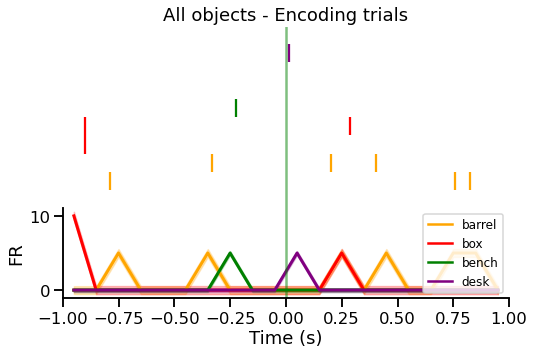

In [76]:
# Plot a comparison of each individual objects
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters([barrel_encode , box_encode, bench_encode, desk_encode], xlim=trial_range, vline=0, 
             colors= ['orange','red','green','purple'],title = 'All objects - Encoding trials',
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, [barrel_frs_encode.mean(0), box_frs_encode.mean(0),bench_frs_encode.mean(0),desk_frs_encode.mean(0) ], shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['orange','red','green','purple'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='orange', lw=2.5, label='barrel'),
                   Line2D([0], [0], color='red', lw=2.5, label='box'),
                   Line2D([0], [0], color='green', lw=2.5, label='bench'),
                   Line2D([0], [0], color='purple', lw=2.5, label='desk')]
plt.legend(handles=legend_elements, loc='best', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))

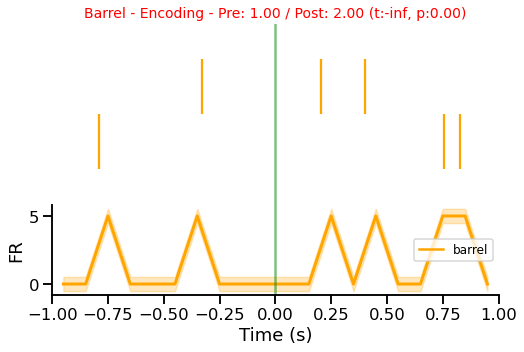

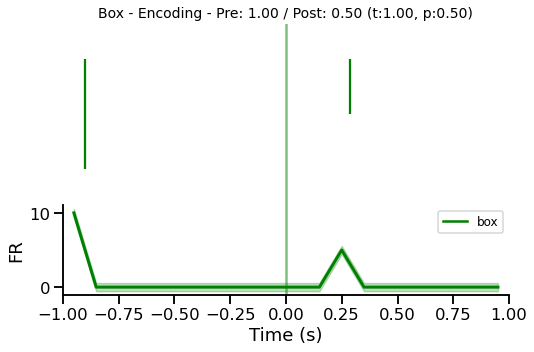

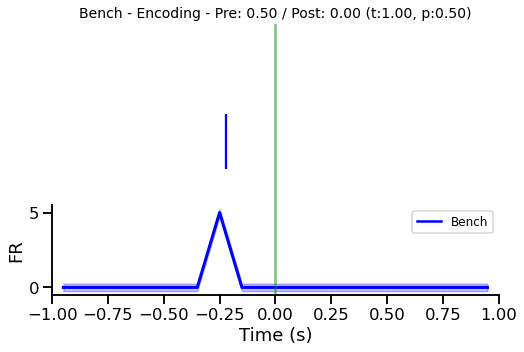

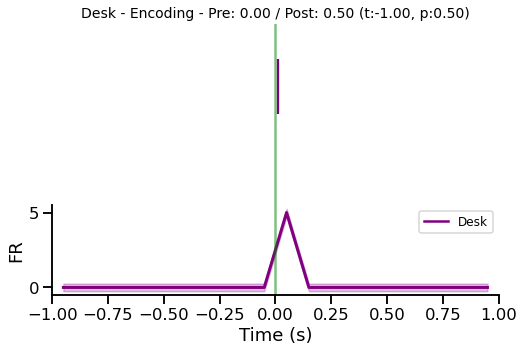

In [77]:
# Barrel 
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters(barrel_encode, xlim=trial_range, vline=0, 
             colors= ['orange'],title = create_raster_title('Barrel - Encoding', fr_pre_barrel_encode, fr_post_barrel_encode,
                                       results_encode['t_val_barrel'], results_encode['p_val_barrel']),
             title_color=color_pvalue(results_encode['p_val_barrel']), title_fontsize=14,
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, barrel_frs_encode.mean(0), shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['orange'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='orange', lw=2.5, label='barrel'),]
plt.legend(handles=legend_elements, loc='best', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))

# Box 
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters(box_encode, xlim=trial_range, vline=0, 
             colors= ['green'],title = create_raster_title('Box - Encoding', fr_pre_box_encode, fr_post_box_encode,
                                       results_encode['t_val_box'], results_encode['p_val_box']),
             title_color=color_pvalue(results_encode['p_val_box']), title_fontsize=14,
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, box_frs_encode.mean(0), shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['green'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='green', lw=2.5, label='box'),]
plt.legend(handles=legend_elements, loc='best', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))

# Bench
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters(bench_encode, xlim=trial_range, vline=0, 
             colors= ['blue'],title = create_raster_title('Bench - Encoding', fr_pre_bench_encode, fr_post_bench_encode,
                                       results_encode['t_val_bench'], results_encode['p_val_bench']),
             title_color=color_pvalue(results_encode['p_val_bench']), title_fontsize=14,
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, bench_frs_encode.mean(0), shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['blue'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='blue', lw=2.5, label='Bench'),]
plt.legend(handles=legend_elements, loc='best', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))

# Desk
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters(desk_encode, xlim=trial_range, vline=0, 
             colors= ['purple'],title =create_raster_title('Desk - Encoding', fr_pre_desk_encode, fr_post_desk_encode,
                                       results_encode['t_val_desk'], results_encode['p_val_desk']),
             title_color=color_pvalue(results_encode['p_val_desk']), title_fontsize=14,
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, desk_frs_encode.mean(0), shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['purple'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='purple', lw=2.5, label='Desk'),]
plt.legend(handles=legend_elements, loc='best', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))

#### Recall Trials

In [78]:
results_recall = {}
fr_pre_barrel_recall, fr_post_barrel_recall, results_recall['t_val_barrel'],results_recall['p_val_barrel'] = compare_pre_post_activity(barrel_recall, pre_window, post_window)
fr_pre_box_recall, fr_post_box_recall, results_recall['t_val_box'], results_recall['p_val_box']= compare_pre_post_activity(box_recall, pre_window, post_window)
fr_pre_bench_recall, fr_post_bench_recall, results_recall['t_val_bench'],results_recall['p_val_bench'] = compare_pre_post_activity(bench_recall, pre_window, post_window)
fr_pre_desk_recall, fr_post_desk_recall, results_recall['t_val_desk'],results_recall['p_val_desk'] = compare_pre_post_activity(desk_recall, pre_window, post_window)

In [79]:
# Computes continuous firing rate across trials 
bin_times, barrel_frs_recall = compute_trial_frs(barrel_recall, 0.1, time_range=[-1,1])
bin_times, box_frs_recall = compute_trial_frs(box_recall, 0.1, time_range=[-1,1])
bin_times, bench_frs_recall = compute_trial_frs(bench_recall, 0.1, time_range=[-1,1])
bin_times, desk_frs_recall = compute_trial_frs(desk_recall, 0.1, time_range=[-1,1])

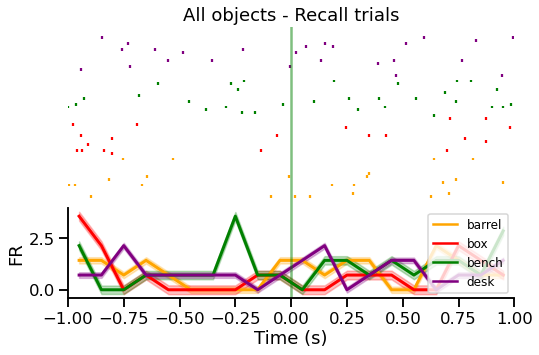

In [80]:
# Plot a comparison of each individual objects
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters([barrel_recall , box_recall, bench_recall, desk_recall], xlim=trial_range, vline=0, 
             colors= ['orange','red','green','purple'],title = 'All objects - Recall trials',
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, [barrel_frs_recall.mean(0), box_frs_recall.mean(0),bench_frs_recall.mean(0),desk_frs_recall.mean(0) ], shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['orange','red','green','purple'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='orange', lw=2.5, label='barrel'),
                   Line2D([0], [0], color='red', lw=2.5, label='box'),
                   Line2D([0], [0], color='green', lw=2.5, label='bench'),
                   Line2D([0], [0], color='purple', lw=2.5, label='desk')]
plt.legend(handles=legend_elements, loc='best', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))

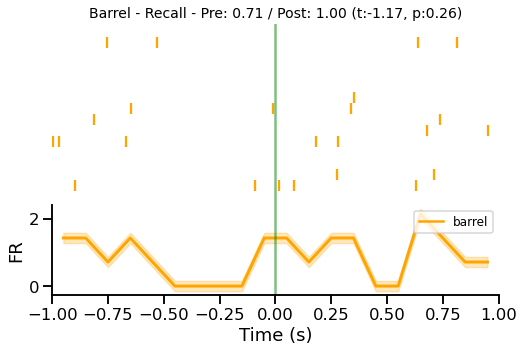

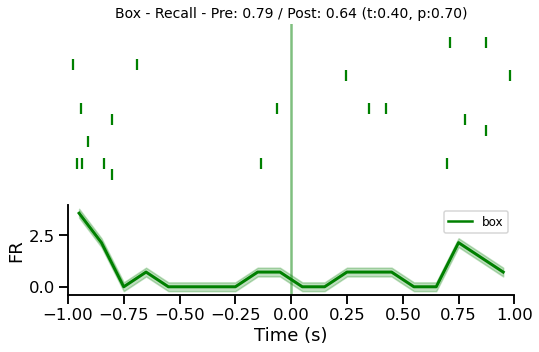

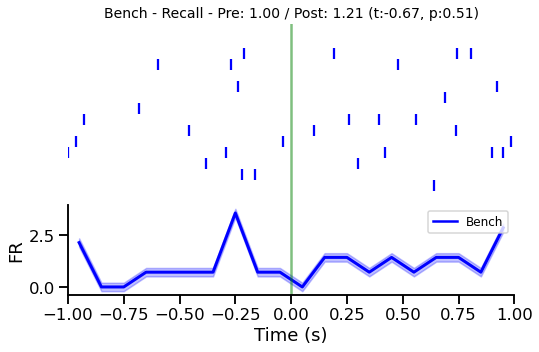

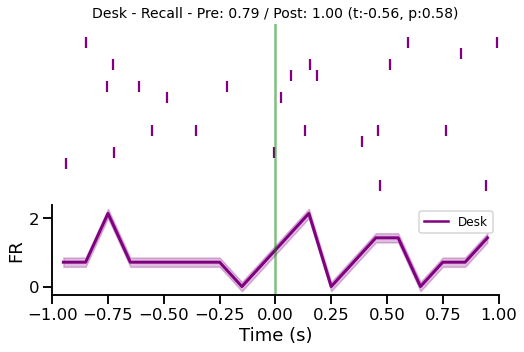

In [84]:
# Barrel 
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters(barrel_recall, xlim=trial_range, vline=0, 
             colors= ['orange'],title = create_raster_title('Barrel - Recall', fr_pre_barrel_recall, fr_post_barrel_recall,
                                       results_recall['t_val_barrel'], results_recall['p_val_barrel']),
             title_color=color_pvalue(results_recall['p_val_barrel']), title_fontsize=14,
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, barrel_frs_recall.mean(0), shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['orange'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='orange', lw=2.5, label='barrel'),]
plt.legend(handles=legend_elements, loc='upper right', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))


# Box 
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters(box_recall, xlim=trial_range, vline=0, 
             colors= ['green'],title = create_raster_title('Box - Recall', fr_pre_box_recall, fr_post_box_recall,
                                       results_recall['t_val_box'], results_recall['p_val_box']),
             title_color=color_pvalue(results_recall['p_val_box']), title_fontsize=14,
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, box_frs_recall.mean(0), shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['green'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='green', lw=2.5, label='box'),]
plt.legend(handles=legend_elements, loc='upper right', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))


# Bench
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters(bench_recall, xlim=trial_range, vline=0, 
             colors= ['blue'],title = create_raster_title('Bench - Recall', fr_pre_bench_recall, fr_post_bench_recall,
                                       results_recall['t_val_bench'], results_recall['p_val_bench']),
             title_color=color_pvalue(results_recall['p_val_bench']), title_fontsize=14,
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, bench_frs_recall.mean(0), shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['blue'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='blue', lw=2.5, label='Bench'),]
plt.legend(handles=legend_elements, loc='upper right', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))


# Desk
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters(desk_recall, xlim=trial_range, vline=0, 
             colors= ['purple'],title =create_raster_title('Desk - Recall', fr_pre_desk_recall, fr_post_desk_recall,
                                       results_recall['t_val_desk'], results_recall['p_val_desk']),
             title_color=color_pvalue(results_recall['p_val_desk']), title_fontsize=14,
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, desk_frs_recall.mean(0), shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['purple'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='purple', lw=2.5, label='Desk'),]
plt.legend(handles=legend_elements, loc='upper right', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))



### Compare encoding and recall

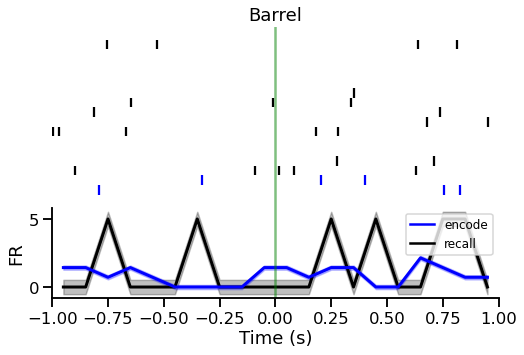

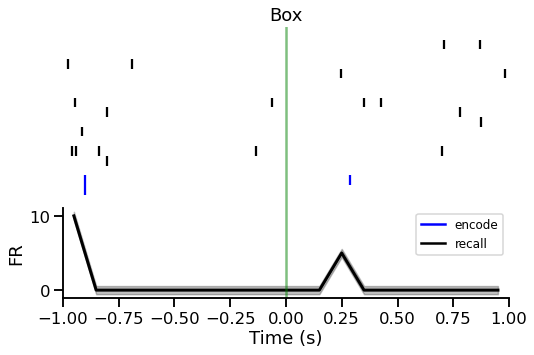

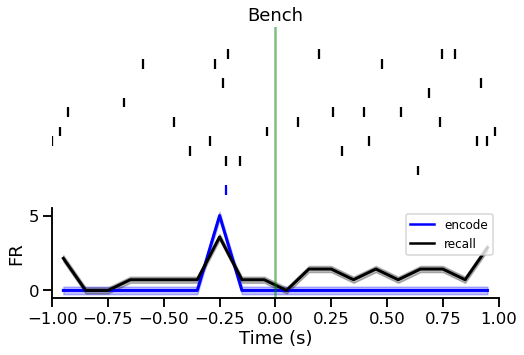

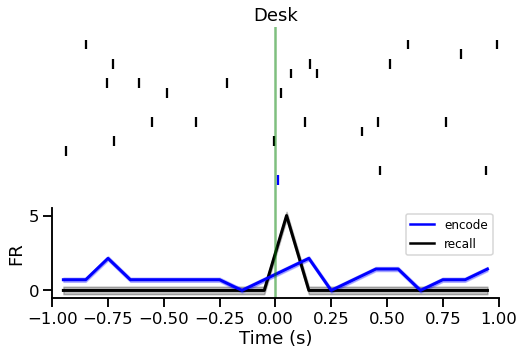

In [85]:
# Barrel 
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters([barrel_encode,barrel_recall], xlim=trial_range, vline=0, 
             colors= ['blue','black'],title = 'Barrel',
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, [barrel_frs_encode.mean(0),barrel_frs_recall.mean(0)], shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['black','blue'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='blue', lw=2.5, label='encode'),
                   Line2D([0], [0], color='black', lw=2.5, label='recall')]
plt.legend(handles=legend_elements, loc='upper right', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))


# Box 
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters([box_encode,box_recall], xlim=trial_range, vline=0, 
             colors= ['blue','black'],title = 'Box',
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, box_frs_encode.mean(0),box_frs_recall.mean(0), shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['black','blue'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='blue', lw=2.5, label='encode'),
                  Line2D([0], [0], color='black', lw=2.5, label='recall')]
plt.legend(handles=legend_elements, loc='upper right', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))


# Bench
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters([bench_encode,bench_recall], xlim=trial_range, vline=0, 
             colors= ['blue','black'],title = 'Bench',
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, [bench_frs_encode.mean(0),bench_frs_recall.mean(0)], shade='sem', 
                  ax=get_grid_subplot(grid, 2, 0), colors=['blue','black'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='blue', lw=2.5, label='encode'),
                  Line2D([0], [0], color='black', lw=2.5, label='recall')]
plt.legend(handles=legend_elements, loc='upper right', ncol=1, fontsize=12)
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))

# Desk
grid = make_grid(3, 1, figsize=(8, 5), hspace=0)
plot_rasters([desk_encode,desk_recall], xlim=trial_range, vline=0, 
             colors= ['blue','black'],title = 'Desk',
             ax=get_grid_subplot(grid, slice(0, 2), 0))

plot_rate_by_time(bin_times, [desk_frs_encode.mean(0),desk_frs_recall.mean(0)], shade='sem', ax=get_grid_subplot(grid, 2, 0), colors=['black','blue'])
add_vlines(0, ax=get_grid_subplot(grid, 2,0), color='green', lw=2.5, alpha=0.5)
get_grid_subplot(grid, 2, 0).set(xlim=[-1,1])
get_grid_subplot(grid, 2, 0).set(xlabel='Time (s)', ylabel='FR')

legend_elements = [Line2D([0], [0], color='blue', lw=2.5, label='encode'),
                   Line2D([0], [0], color='black', lw=2.5, label='recall')]
drop_spines(['top', 'right'],get_grid_subplot(grid, 2, 0))
plt.legend(handles=legend_elements, loc='upper right', ncol=1, fontsize=12)